## Phishing Domain Detection 




---
#### © Shreyash Somvanshi

Final Deployed app link: 🌐 [https://shreyashsomvanshi-phishing-domain-detection-app-owf928.streamlit.app/](https://shreyashsomvanshi-phishing-domain-detection-app-owf928.streamlit.app/)

---

<!-- **Dataset Link:** https://raw.githubusercontent.com/laxmanbalaraman/Phishing-website-prediction/main/phishing_detection.csv<br/> -->
**Dataset Link:** https://raw.githubusercontent.com/ShreyashSomvanshi/Phishing-Domain-Detection/main/Datasets/phishing_dataset.csv <br/>

<!-- **Feature description**: https://docs.google.com/document/d/1AGBWnCNGseN9Gv3gW2e5tfVzcu87Mfbo/edit?usp=sharing&ouid=117945722635081072189&rtpof=true&sd=true -->

In [1]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

### Importing dataset and dataset analysis

In [2]:
df = pd.read_csv(r"https://raw.githubusercontent.com/ShreyashSomvanshi/Phishing-Domain-Detection/main/Datasets/phishing_dataset.csv")

In [3]:
df.head()
# result is the target attribute

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
df.shape

(11055, 31)

In [5]:
 df.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

Dataset has 11055 rows and 32 column

In [6]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

### checking for null values

In [8]:
# no null values
df.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

### checking if target class is equally balanced 

<Axes: xlabel='Result', ylabel='count'>

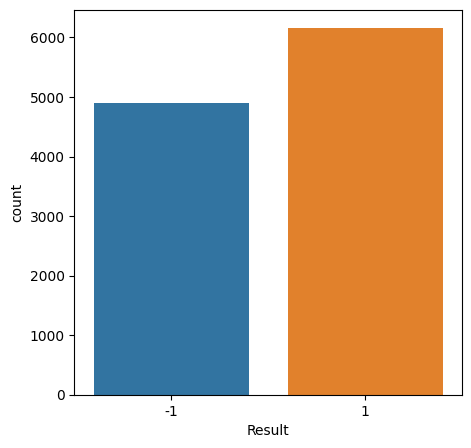

In [9]:
plt.figure(figsize=(5,5))
# count numbers of class records for 'Result' target attribute
sns.countplot(data = df,x=df['Result'])

In [10]:
df['Result'].value_counts()

 1    6157
-1    4898
Name: Result, dtype: int64

we can see the target class count is almost equally balanced. Hence Data augmentation is necessary

### Identifying multicollinear columns

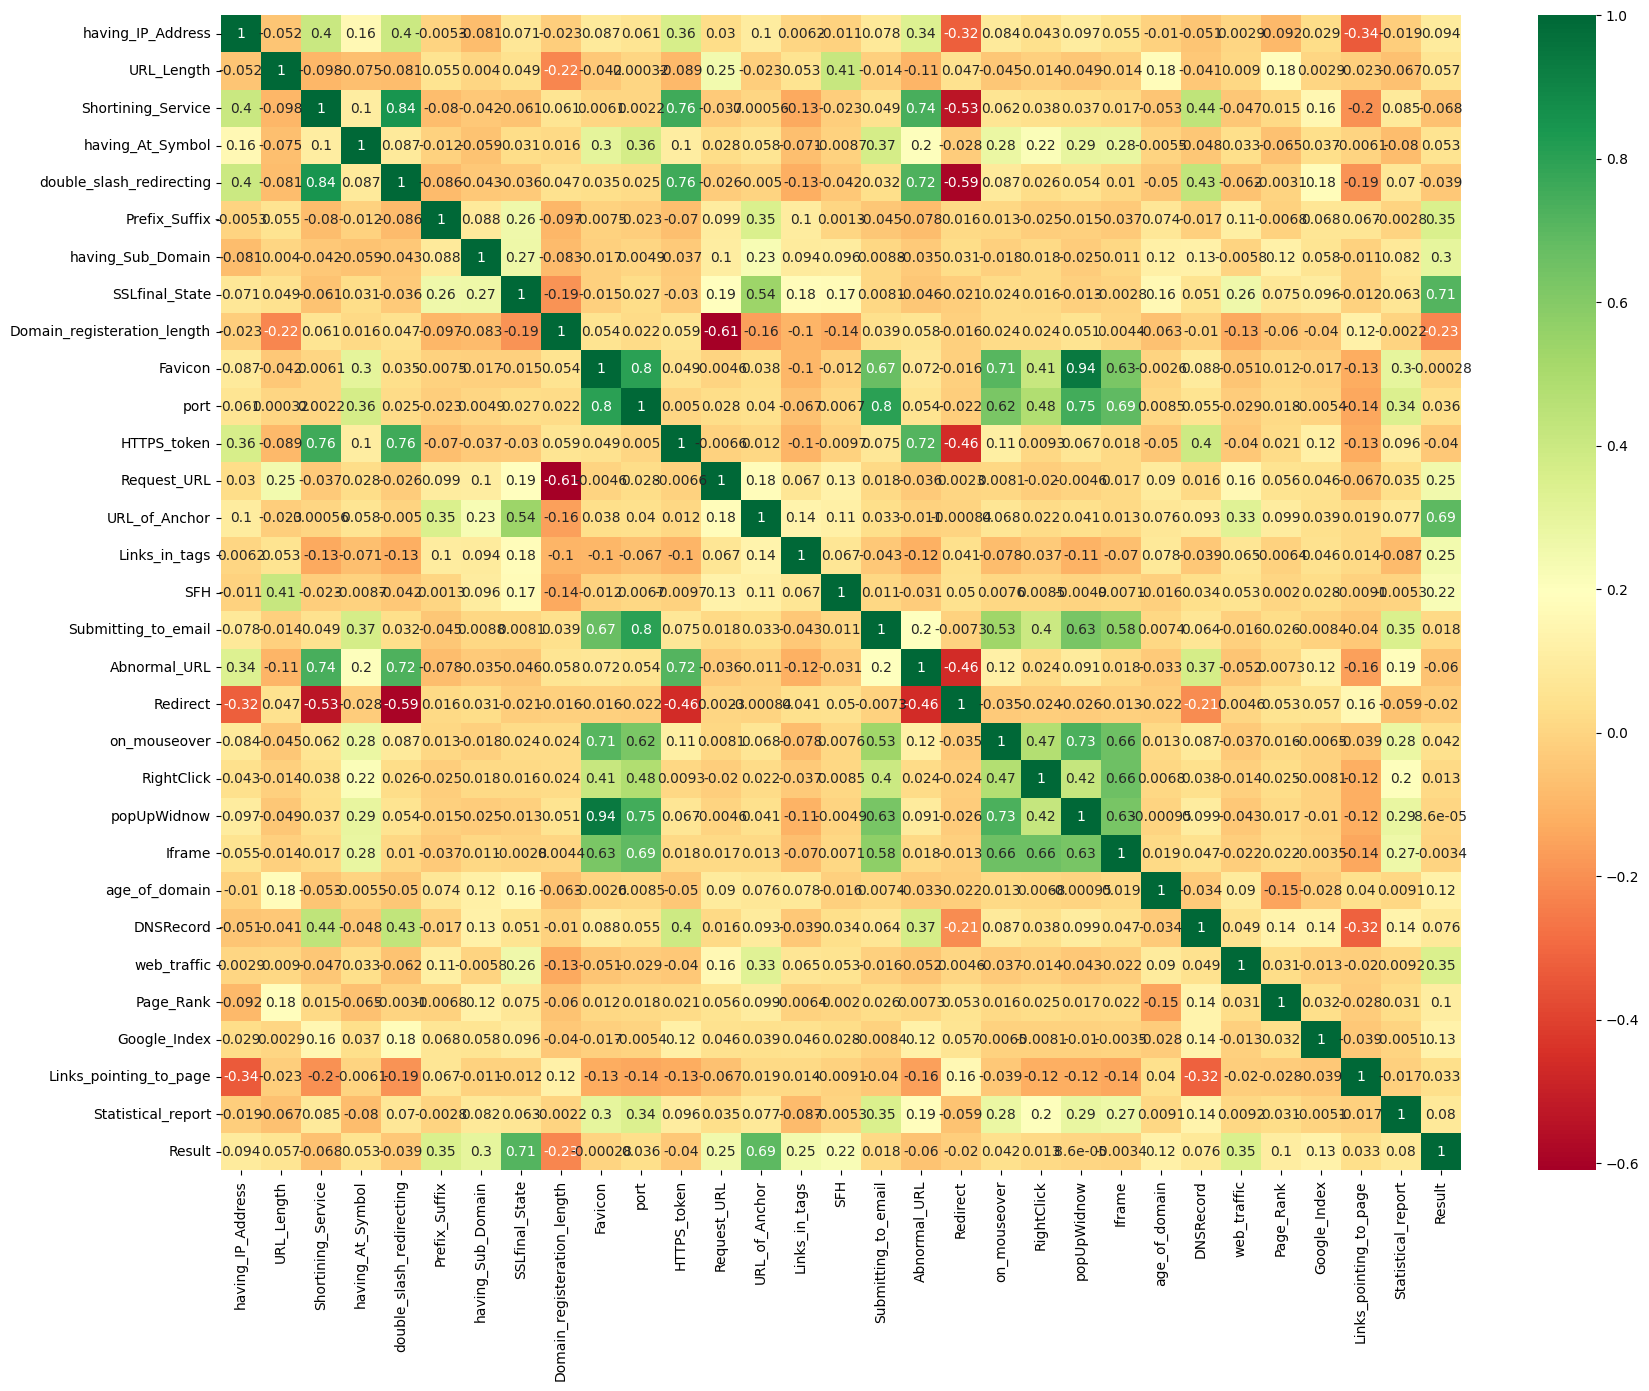

In [11]:
# creating correlation matrix on the features 
corrmat = df.corr()
top_corr_features = corrmat.index
top_corr_features
plt.figure(figsize=(20, 15))
# # representation of correalation matrix through heatmap
g = sns.heatmap(df[top_corr_features].corr(), annot = True, cmap = "RdYlGn")

In [12]:
col_corr = set() # Set of all the names of deleted columns
def correlation(dataset, threshold):
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
      for j in range(i):
          if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
              colname = corr_matrix.columns[i] # getting the name of column
              col_corr.add(colname)

In [13]:
# remove multicollinear column with collinearity greater than 0.85
correlation(df, 0.85)
col_corr

{'popUpWidnow'}

In [14]:
# identifying weakly correlated features with target attribute
weak_col_corr = set()
def weakcorrelation(dataset, threshold):
  corr_matrix = dataset.corr()
  idx = 0
  for feature in corr_matrix['Result']:
    if(feature < threshold):
      weak_col_corr.add(corr_matrix.columns[idx])
    idx += 1
  
 # dropping features with correlation less than 0.01 
weakcorrelation(df, 0.01)
print(weak_col_corr)

{'Abnormal_URL', 'HTTPS_token', 'Shortining_Service', 'double_slash_redirecting', 'Redirect', 'popUpWidnow', 'Domain_registeration_length', 'Favicon', 'Iframe'}


In [15]:
# gathering all columns that were identified to be deleted
del_col = col_corr.union(weak_col_corr)
del_col

{'Abnormal_URL',
 'Domain_registeration_length',
 'Favicon',
 'HTTPS_token',
 'Iframe',
 'Redirect',
 'Shortining_Service',
 'double_slash_redirecting',
 'popUpWidnow'}

In [16]:
# dropping columns permanantly
df.drop(del_col, axis = 1, inplace = True)

In [17]:
df.isnull().sum()

having_IP_Address         0
URL_Length                0
having_At_Symbol          0
Prefix_Suffix             0
having_Sub_Domain         0
SSLfinal_State            0
port                      0
Request_URL               0
URL_of_Anchor             0
Links_in_tags             0
SFH                       0
Submitting_to_email       0
on_mouseover              0
RightClick                0
age_of_domain             0
DNSRecord                 0
web_traffic               0
Page_Rank                 0
Google_Index              0
Links_pointing_to_page    0
Statistical_report        0
Result                    0
dtype: int64

### splitting dataset into train and test 

In [18]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [19]:
# input attribute and target attribute
X = df.iloc[: , :-1]
y = df.iloc[:, -1:]

In [20]:
X

,having_IP_Address,URL_Length,having_At_Symbol,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,port,Request_URL,URL_of_Anchor,Links_in_tags,...,Submitting_to_email,on_mouseover,RightClick,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,-1,-1,-1,1,1,-1,1,...,-1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,-1,0,1,1,1,0,-1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,-1,-1,-1,1,1,0,-1,...,-1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,-1,-1,-1,1,-1,0,0,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,1,-1,1,1,1,1,0,0,...,1,-1,1,-1,-1,0,-1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,-1,1,1,1,-1,1,1,1,...,-1,-1,-1,1,1,-1,-1,1,1,1
11051,-1,1,-1,-1,1,-1,-1,1,-1,-1,...,-1,-1,1,1,1,1,1,1,-1,1
11052,1,-1,1,-1,1,-1,1,1,0,-1,...,1,1,1,1,1,1,-1,1,0,1
11053,-1,-1,1,-1,-1,-1,1,-1,-1,1,...,1,-1,1,1,1,1,-1,1,1,1


In [21]:
y

,Result
0,-1
1,-1
2,-1
3,-1
4,1
...,...
11050,1
11051,-1
11052,-1
11053,-1


In [22]:
# train test split with test size as 0.25 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Decision tree classifier

In [23]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred1 = clf.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy: ',accuracy_score(y_test,y_pred1))
print('Precision: ',precision_score(y_test,y_pred1))
print('Recall: ',recall_score(y_test,y_pred1))
print('F1 Score:', f1_score(y_test, y_pred1))

Accuracy:  0.9535725052758517
Precision:  0.9624101713653952
Recall:  0.952928297755884
F1 Score: 0.9576457645764577


In [25]:
clf.score(X_train, y_train)

0.9890152494184544

In [26]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_pred1, y_test))

Accuracy: 0.9535725052758517


In [27]:
from sklearn.metrics import confusion_matrix, classification_report
# classification report
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

          -1       0.94      0.95      0.95      1490
           1       0.96      0.95      0.96      1827

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



**Confusion matrix for decision tree model**

A confusion matrix is a summary of prediction results on a classification problem.

The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.



In [28]:
# the confusion matrix for our model
confusion_matrix(y_test, y_pred1)

array([[1422,   68],
       [  86, 1741]])

<Axes: >

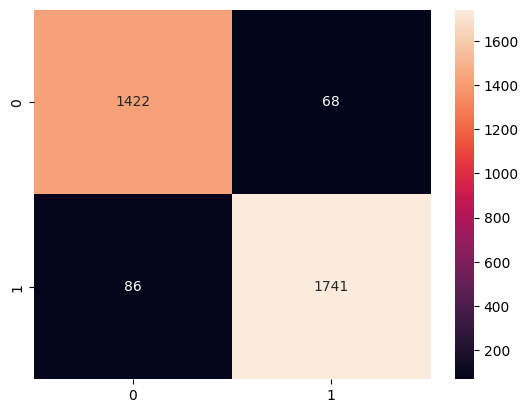

In [29]:
sns.heatmap(confusion_matrix(y_test, y_pred1), annot = True, fmt='0.0f')

### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
# fittin the model
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
# prediction on validation dataset
y_pred2 = rfc.predict(X_test)

In [32]:
from sklearn import metrics
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred2))

ACCURACY OF THE MODEL:  0.9650286403376545


In [33]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

          -1       0.96      0.96      0.96      1490
           1       0.97      0.97      0.97      1827

    accuracy                           0.97      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.97      0.97      0.97      3317



In [34]:
confusion_matrix(y_test, y_pred2)

array([[1428,   62],
       [  54, 1773]])

<Axes: >

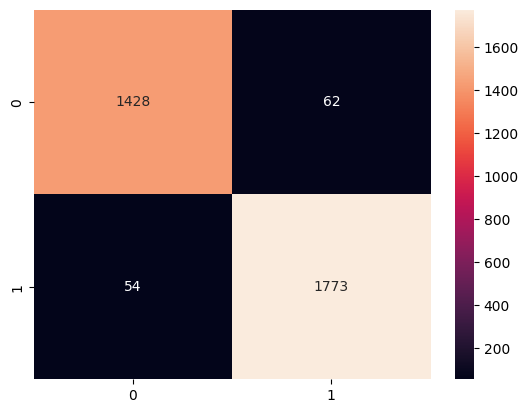

In [35]:
sns.heatmap(confusion_matrix(y_test, y_pred2), annot = True, fmt='0.0f')

In [36]:
print('Accuracy: ',accuracy_score(y_test,y_pred2))
print('Precision: ',precision_score(y_test,y_pred2))
print('Recall: ',recall_score(y_test,y_pred2))
print('F1 Score:', f1_score(y_test, y_pred2))

Accuracy:  0.9650286403376545
Precision:  0.9662125340599454
Recall:  0.9704433497536946
F1 Score: 0.9683233205898416


### SVM


In [37]:
from sklearn.svm import SVC
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, gamma= 1, kernel='sigmoid', random_state=42)


In [38]:
svc_model.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='sigmoid', random_state=42)

In [39]:
y_pred3 = svc_model.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
# generating classification report
print(classification_report(y_test, y_pred3))


              precision    recall  f1-score   support

          -1       0.67      0.66      0.66      1490
           1       0.72      0.74      0.73      1827

    accuracy                           0.70      3317
   macro avg       0.70      0.70      0.70      3317
weighted avg       0.70      0.70      0.70      3317



In [41]:
confusion_matrix(y_test, y_pred3)

array([[ 976,  514],
       [ 477, 1350]])

<Axes: >

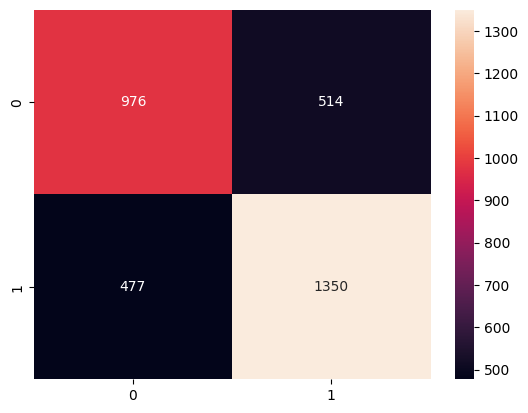

In [42]:
sns.heatmap(confusion_matrix(y_test, y_pred3), annot = True, fmt='0.0f')

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy: ',accuracy_score(y_test,y_pred3))
print('Precision: ',precision_score(y_test,y_pred3))
print('Recall: ',recall_score(y_test,y_pred3))
print('F1 Score:', f1_score(y_test, y_pred3))

Accuracy:  0.7012360566777208
Precision:  0.7242489270386266
Recall:  0.7389162561576355
F1 Score: 0.7315090761311298


### K-nearest Neighbors

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#### choosing the best values of k (neighbours)

In [45]:
neighbour = []
accuracy = []
for k in range(1, 20):
  k_near = KNeighborsClassifier(n_neighbors=k)
  k_near.fit(X,y)
  Y_pre_test = k_near.predict(X_test)
  Y_pre_train = k_near.predict(X_train)
  test_accuracy = accuracy_score(Y_pre_test, y_test)
  neighbour.append(k)
  accuracy.append(test_accuracy)

Text(0, 0.5, 'accuracy')

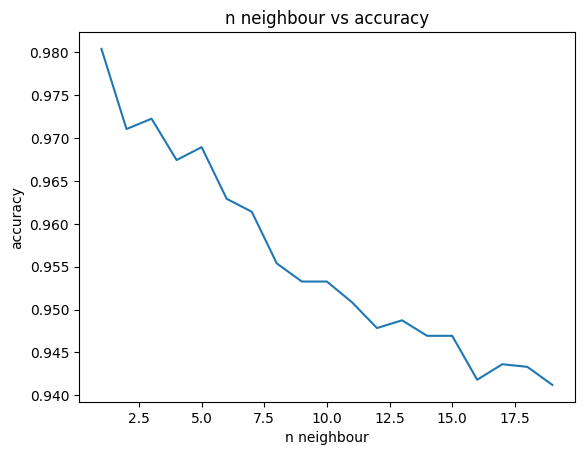

In [46]:
# plotting for n neighbour vs accuracy
plt.plot(neighbour, accuracy)
plt.title('n neighbour vs accuracy')
plt.xlabel('n neighbour')
plt.ylabel('accuracy')

we can see the accuracy is highest for n_neighbours = 1

#### KNN with n_neighbour = 1 

In [47]:
k_near = KNeighborsClassifier(n_neighbors=1)
k_near.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [48]:
y_pred4 = k_near.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_pred4, y_test)
print('Accuracy for test dataset for K-neariest : ', test_accuracy)

Accuracy for test dataset for K-neariest :  0.9463370515526078


In [50]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

          -1       0.94      0.94      0.94      1490
           1       0.95      0.95      0.95      1827

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



In [51]:
confusion_matrix(y_test, Y_pre_test )

array([[1388,  102],
       [  93, 1734]])

<Axes: >

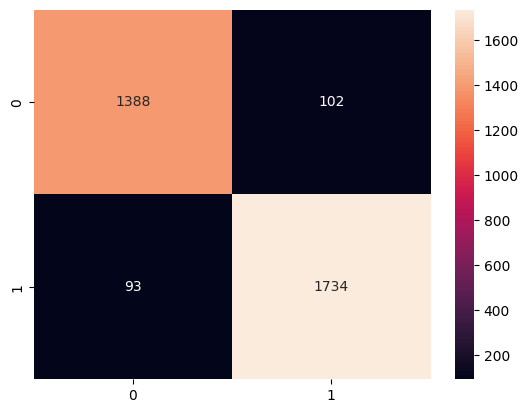

In [52]:
sns.heatmap(confusion_matrix(y_test, Y_pre_test), annot = True, fmt='0.0f')

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy: ',accuracy_score(y_test,y_pred4))
print('Precision: ',precision_score(y_test,y_pred4))
print('Recall: ',recall_score(y_test,y_pred4))
print('F1 Score:', f1_score(y_test, y_pred4))

Accuracy:  0.9463370515526078
Precision:  0.9527732015376167
Recall:  0.9496442255062945
F1 Score: 0.9512061403508771


### Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lgr = LogisticRegression(random_state=0)
lgr.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [56]:
y_pred5 = lgr.predict(X_test)

In [57]:
test_accuracy = accuracy_score(y_pred5, y_test)
print('Accuracy for test dataset for logistic reg : ', test_accuracy)

Accuracy for test dataset for logistic reg :  0.9231233041905336


In [58]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred5))


              precision    recall  f1-score   support

          -1       0.93      0.89      0.91      1490
           1       0.92      0.95      0.93      1827

    accuracy                           0.92      3317
   macro avg       0.92      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317



In [59]:
confusion_matrix(y_test, y_pred5)

array([[1331,  159],
       [  96, 1731]])

<Axes: >

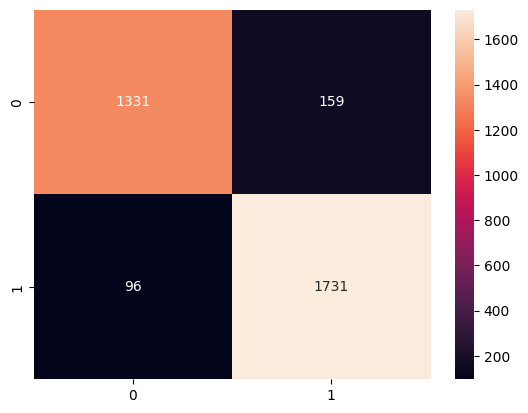

In [60]:
sns.heatmap(confusion_matrix(y_test,y_pred5), annot = True, fmt='0.0f')

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy: ',accuracy_score(y_test,y_pred5))
print('Precision: ',precision_score(y_test,y_pred5))
print('Recall: ',recall_score(y_test,y_pred5))
print('F1 Score:', f1_score(y_test, y_pred5))

Accuracy:  0.9231233041905336
Precision:  0.9158730158730158
Recall:  0.9474548440065681
F1 Score: 0.9313962873284907


### Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, BernoulliNB, ComplementNB

In [63]:
# Bernoullis Naive bayes classifier
nvb = BernoulliNB()
nvb.fit(X_train,y_train)

BernoulliNB()

In [64]:
y_pred6 = nvb.predict(X_test)

In [65]:
test_accuracy = accuracy_score(y_pred6, y_test)
print('Accuracy for test dataset for naive bayes reg : ', test_accuracy)

Accuracy for test dataset for naive bayes reg :  0.9083509195055773


In [66]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred6))


              precision    recall  f1-score   support

          -1       0.91      0.89      0.90      1490
           1       0.91      0.92      0.92      1827

    accuracy                           0.91      3317
   macro avg       0.91      0.91      0.91      3317
weighted avg       0.91      0.91      0.91      3317



In [67]:
confusion_matrix(y_test, y_pred6)

array([[1325,  165],
       [ 139, 1688]])

<Axes: >

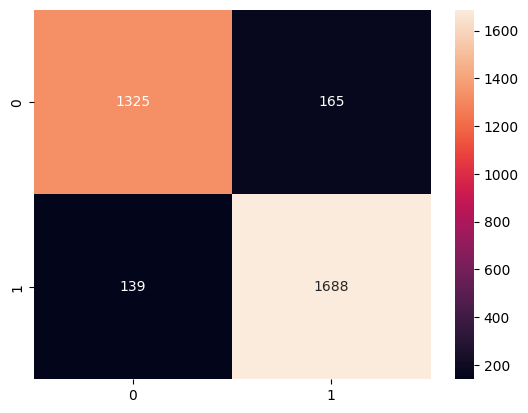

In [68]:
sns.heatmap(confusion_matrix(y_test, y_pred6), annot = True, fmt='0.0f')

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy: ',accuracy_score(y_test,y_pred6))
print('Precision: ',precision_score(y_test,y_pred6))
print('Recall: ',recall_score(y_test,y_pred6))
print('F1 Score:', f1_score(y_test, y_pred6))

Accuracy:  0.9083509195055773
Precision:  0.9109552077711819
Recall:  0.9239189928845101
F1 Score: 0.9173913043478261


### Adaboost

In [70]:
from sklearn.ensemble import AdaBoostClassifier

# Create Decision Tree classifer object
clf = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train Decision Tree Classifer
clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred7 = clf.predict(X_test)

In [71]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred7))

Accuracy: 0.9303587579137775


In [72]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

          -1       0.94      0.90      0.92      1490
           1       0.92      0.96      0.94      1827

    accuracy                           0.93      3317
   macro avg       0.93      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317



<Axes: >

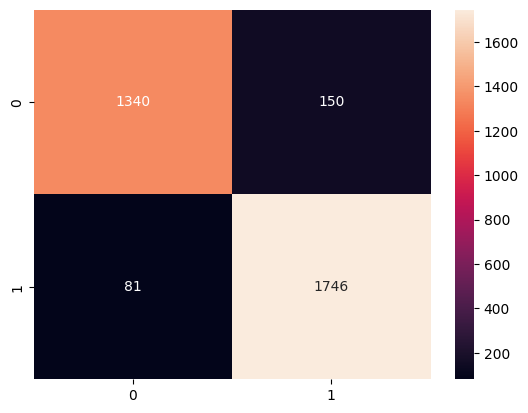

In [73]:
confusion_matrix(y_test, y_pred7)
sns.heatmap(confusion_matrix(y_test, y_pred7), annot = True, fmt='0.0f')

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy: ',accuracy_score(y_test,y_pred7))
print('Precision: ',precision_score(y_test,y_pred7))
print('Recall: ',recall_score(y_test,y_pred7))
print('F1 Score:', f1_score(y_test, y_pred7))

Accuracy:  0.9303587579137775
Precision:  0.9208860759493671
Recall:  0.9556650246305419
F1 Score: 0.9379532634971799


<center>

---

| Algorithm | Accuracy | Precision | Recall | F1-Score |
|----|-------|--------|-----|----|
|Decision Tree Classifier|0.95|0.96|0.95|0.96|
|Random Forest Classifier|0.96|0.96|0.97|0.96|
|SVM|0.70|0.72|0.74|0.73|
|KNN|0.94|0.95|0.94|0.95|
|Logistic Regression|0.92|0.91|0.95|0.93|
|Naive Bayes|0.90|0.91|0.92|0.91|
|Adaboost|0.93|0.92|0.95|0.94|

---
</center>

In [75]:
import pickle 
pickle_out = open("RFclassifier.pkl", mode = "wb") 
pickle.dump(rfc, pickle_out) 
pickle_out.close()

In [81]:
X_train.sample()

,having_IP_Address,URL_Length,having_At_Symbol,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,port,Request_URL,URL_of_Anchor,Links_in_tags,...,Submitting_to_email,on_mouseover,RightClick,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
3934,1,-1,1,-1,-1,1,1,1,0,0,...,1,1,1,-1,-1,0,-1,1,-1,1


In [89]:
for i in df.columns:
  print(i,df[i].unique())

having_IP_Address [-1  1]
URL_Length [ 1  0 -1]
having_At_Symbol [ 1 -1]
Prefix_Suffix [-1  1]
having_Sub_Domain [-1  0  1]
SSLfinal_State [-1  1  0]
port [ 1 -1]
Request_URL [ 1 -1]
URL_of_Anchor [-1  0  1]
Links_in_tags [ 1 -1  0]
SFH [-1  1  0]
Submitting_to_email [-1  1]
on_mouseover [ 1 -1]
RightClick [ 1 -1]
age_of_domain [-1  1]
DNSRecord [-1  1]
web_traffic [-1  0  1]
Page_Rank [-1  1]
Google_Index [ 1 -1]
Links_pointing_to_page [ 1  0 -1]
Statistical_report [-1  1]
Result [-1  1]


In [94]:
y_pred1

array([-1,  1,  1, ...,  1, -1, -1])

In [97]:
df.iloc[50]

having_IP_Address         1
URL_Length               -1
having_At_Symbol          1
Prefix_Suffix            -1
having_Sub_Domain         1
SSLfinal_State            1
port                      1
Request_URL               1
URL_of_Anchor             0
Links_in_tags            -1
SFH                      -1
Submitting_to_email       1
on_mouseover              1
RightClick                1
age_of_domain             1
DNSRecord                 1
web_traffic               0
Page_Rank                -1
Google_Index              1
Links_pointing_to_page    0
Statistical_report        1
Result                   -1
Name: 50, dtype: int64

## Streamlit App

In [ ]:
import pickle
import streamlit as st
from PIL import Image

image = Image.open('img/phweb.jpg')

st.image(image, caption='Credits: Pexel.com',width=700)
 
# loading the trained model
pickle_in = open('RFclassifier.pkl', 'rb') 
classifier = pickle.load(pickle_in)
      
@st.cache_data()

# defining the function which will make the prediction using the data which the user inputs 
def prediction(having_IP_Address, URL_Length, having_At_Symbol, Prefix_Suffix, having_Sub_Domain, SSLfinal_State, port, Request_URL, URL_of_Anchor, Links_in_tags, SFH, Submitting_to_email, on_mouseover, RightClick, age_of_domain, DNSRecord, web_traffic, Page_Rank, Google_Index, Links_pointing_to_page, Statistical_report):   
 
    # Making predictions 
    prediction = classifier.predict( 
        [[having_IP_Address, URL_Length, having_At_Symbol, Prefix_Suffix, having_Sub_Domain, SSLfinal_State, port, Request_URL, URL_of_Anchor, Links_in_tags, SFH, Submitting_to_email, on_mouseover, RightClick, age_of_domain, DNSRecord, web_traffic, Page_Rank, Google_Index, Links_pointing_to_page, Statistical_report]])
    return prediction
      
# this is the main function in which we define our webpage 
def main():       
    # front end elements of the web page 
    html_temp = """ 
    <div style ="background-color:black;padding:13px"> 
    <h1 style ="color:blue;text-align:center;">Phishing Website Detection ML App</h1> 
    </div> 
    """
      
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True) 
    # st.header('Phishing Website Detection App')

    col1, col2, col3, col4 = st.columns(4, gap='medium')
      
    with col1:
        having_IP_Address = st.selectbox('Has IP Address ?',("-1","1"))
        URL_Length = st.selectbox('URL Length ?',("-1","0","1"))
        having_At_Symbol = st.selectbox('Has @ Symbol ?',("-1","1"))
        Prefix_Suffix = st.selectbox('Has Prefix Suffix ?',("-1","1"))
        having_Sub_Domain = st.selectbox('Has Sub Domain ?',("-1","0","1"))
        Statistical_report = st.selectbox('Has Statistical_report ?',("-1","1"))
    
    with col2:
        SSLfinal_State = st.selectbox('Has SSL final State ?',("-1","0","1"))
        port = st.selectbox('Has port ?',("-1","1"))
        Request_URL = st.selectbox('Has Request URL ?',("-1","1"))
        URL_of_Anchor = st.selectbox('Has URL_of_Anchor ?',("-1","0","1"))
        Links_in_tags = st.selectbox('Has Links_in_tags ?',("-1","0","1"))
    
    with col3:
        SFH = st.selectbox('Has SFH ?',("-1","0","1"))
        Submitting_to_email = st.selectbox('Has Submitting to email ?',("-1","1"))
        on_mouseover = st.selectbox('Has on_mouseover ?',("-1","1"))
        RightClick = st.selectbox('Has RightClick ?',("-1","1"))
        age_of_domain = st.selectbox('Has age_of_domain ?',("-1","1"))

    with col4:
        DNSRecord = st.selectbox('Has DNSRecord ?',("-1","1"))
        web_traffic = st.selectbox('Has web_traffic ?',("-1","0","1"))
        Page_Rank = st.selectbox('Has Page_Rank ?',("-1","1"))
        Google_Index = st.selectbox('Has Google_Index ?',("-1","1"))
        Links_pointing_to_page = st.selectbox('Links_pointing_page?',("-1","0","1"))
        result = ""
        y=st.button("Predict")
      
    if y: 
        result = prediction(having_IP_Address, URL_Length, having_At_Symbol, Prefix_Suffix, having_Sub_Domain, SSLfinal_State, port, Request_URL, URL_of_Anchor, Links_in_tags, SFH, Submitting_to_email, on_mouseover, RightClick, age_of_domain, DNSRecord, web_traffic, Page_Rank, Google_Index, Links_pointing_to_page, Statistical_report) 
        # st.success('Your domain is {}'.format(result))
        if result[0]==-1:
            st.error('Be Careful, Its a Phishing Domain!!', icon='🚨')
        else:
            st.success('It is a Safe domain.')
            st.balloons()
    
     
if __name__=='__main__': 
    main()
